In [1]:
!pip install selenium
!pip install bs4
!apt-get update # to update ubuntu to correctly run apt install
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 981 kB 8.0 MB/s 
     |████████████████████████████████| 139 kB 52.5 MB/s 
     |████████████████████████████████| 358 kB 69.3 MB/s 
     |████████████████████████████████| 4.1 MB 44.5 MB/s 
     |████████████████████████████████| 55 kB 4.1 MB/s 
     |████████████████████████████████| 58 kB 5.6 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
requests 2.23.0 requires urllib3!=1.25.0,!=1.25.1,<1.26,>=1.21.1, but you have urllib3 1.26.10 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
Looking in ind

In [6]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.firefox.options import Options
from bs4 import BeautifulSoup
import sys

sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')

driver = webdriver.Chrome('chromedriver',chrome_options=chrome_options)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: DeprecationWarning: use options instead of chrome_options
  del sys.path[0]


In [7]:
from datetime import date, timedelta
from dateutil.relativedelta import relativedelta

delta = relativedelta(date(2022, 6, 10), date(2022, 1, 1))
dates = [date(2022, 1, 1) + relativedelta(days=day) for day in range(delta.months*30 + delta.days)]

print(dates)

dt_strs = list(map(lambda d:d.strftime('%Y-%m-%d'), dates))
print(dt_strs)

[datetime.date(2022, 1, 1), datetime.date(2022, 1, 2), datetime.date(2022, 1, 3), datetime.date(2022, 1, 4), datetime.date(2022, 1, 5), datetime.date(2022, 1, 6), datetime.date(2022, 1, 7), datetime.date(2022, 1, 8), datetime.date(2022, 1, 9), datetime.date(2022, 1, 10), datetime.date(2022, 1, 11), datetime.date(2022, 1, 12), datetime.date(2022, 1, 13), datetime.date(2022, 1, 14), datetime.date(2022, 1, 15), datetime.date(2022, 1, 16), datetime.date(2022, 1, 17), datetime.date(2022, 1, 18), datetime.date(2022, 1, 19), datetime.date(2022, 1, 20), datetime.date(2022, 1, 21), datetime.date(2022, 1, 22), datetime.date(2022, 1, 23), datetime.date(2022, 1, 24), datetime.date(2022, 1, 25), datetime.date(2022, 1, 26), datetime.date(2022, 1, 27), datetime.date(2022, 1, 28), datetime.date(2022, 1, 29), datetime.date(2022, 1, 30), datetime.date(2022, 1, 31), datetime.date(2022, 2, 1), datetime.date(2022, 2, 2), datetime.date(2022, 2, 3), datetime.date(2022, 2, 4), datetime.date(2022, 2, 5), datet

In [8]:
import time
import pandas as pd
pages = []

for dt_str in dt_strs:
    driver.get(f"https://www.wunderground.com/history/daily/us/ca/burbank/KBUR/date/{dt_str}")
    time.sleep(3)
    pages.append(BeautifulSoup(driver.page_source))

In [9]:
feature_names = ["High Temp",
                 "Low Temp",
                 "Day Average Temp",
                 "Precipitation (past 24 hours from 07:53:00)",
                 "Dew Point",
                 "High",
                 "Low",
                 "Average",
                 "Max Wind Speed",
                 "Visibility",
                 "Sea Level Pressure"]
data_frame = {}
for ft in feature_names:
    data_frame[f"{ft} (Actual)"] = []
    data_frame[f"{ft} (Historic Avg)"] = []
    data_frame[f"{ft} (Record)"] = []

data_frame["Date"] = pd.Series(dt_strs)

for soup in pages:
    for ft in feature_names:
        try:
            row = soup.find(lambda tag:tag.name == "th" and ft == tag.text)
            try:
              act = float(row.find_next_siblings("td")[0].text)
            except:
              actual = None
            
            try:
              hist_avg = float(row.find_next_siblings("td")[1].text)
            except:
              hist_avg = None

            try:
              rec = float(row.find_next_siblings("td")[2].text)
            except:
              rec = None
        except:
            actual, hist_avg, rec = None, None, None

        data_frame[f"{ft} (Actual)"].append(act)
        data_frame[f"{ft} (Historic Avg)"].append(hist_avg)
        data_frame[f"{ft} (Record)"].append(rec)

In [10]:
pd.DataFrame(data_frame)

,High Temp (Actual),High Temp (Historic Avg),High Temp (Record),Low Temp (Actual),Low Temp (Historic Avg),Low Temp (Record),Day Average Temp (Actual),Day Average Temp (Historic Avg),Day Average Temp (Record),Precipitation (past 24 hours from 07:53:00) (Actual),...,Max Wind Speed (Actual),Max Wind Speed (Historic Avg),Max Wind Speed (Record),Visibility (Actual),Visibility (Historic Avg),Visibility (Record),Sea Level Pressure (Actual),Sea Level Pressure (Historic Avg),Sea Level Pressure (Record),Date
0,62.0,66.5,87.0,41.0,44.8,26.0,51.28,55.6,None,51.28,...,7.0,None,None,10.0,None,None,29.42,None,None,2022-01-01
1,64.0,66.6,86.0,39.0,44.8,27.0,50.91,55.7,None,50.91,...,9.0,None,None,10.0,None,None,29.47,None,None,2022-01-02
2,66.0,66.6,86.0,38.0,44.9,27.0,50.83,55.8,None,50.83,...,9.0,None,None,10.0,None,None,29.39,None,None,2022-01-03
3,65.0,66.7,89.0,40.0,45.0,28.0,51.30,55.8,None,51.30,...,7.0,None,None,10.0,None,None,29.42,None,None,2022-01-04
4,72.0,66.8,89.0,46.0,45.0,27.0,58.00,55.9,None,58.00,...,8.0,None,None,10.0,None,None,29.30,None,None,2022-01-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,75.0,77.4,104.0,63.0,58.3,46.0,67.37,67.9,None,0.00,...,12.0,None,None,10.0,None,None,29.12,None,None,2022-06-04
155,80.0,77.6,101.0,62.0,58.4,47.0,68.41,68.0,None,0.00,...,12.0,None,None,10.0,None,None,29.10,None,None,2022-06-05
156,81.0,77.8,99.0,65.0,58.5,46.0,71.88,68.2,None,0.00,...,12.0,None,None,10.0,None,None,29.06,None,None,2022-06-06
157,84.0,78.0,98.0,64.0,58.6,47.0,71.97,68.3,None,0.00,...,12.0,None,None,10.0,None,None,29.04,None,None,2022-06-07


In [11]:
pd.DataFrame(data_frame).to_csv("daily_2022.csv")

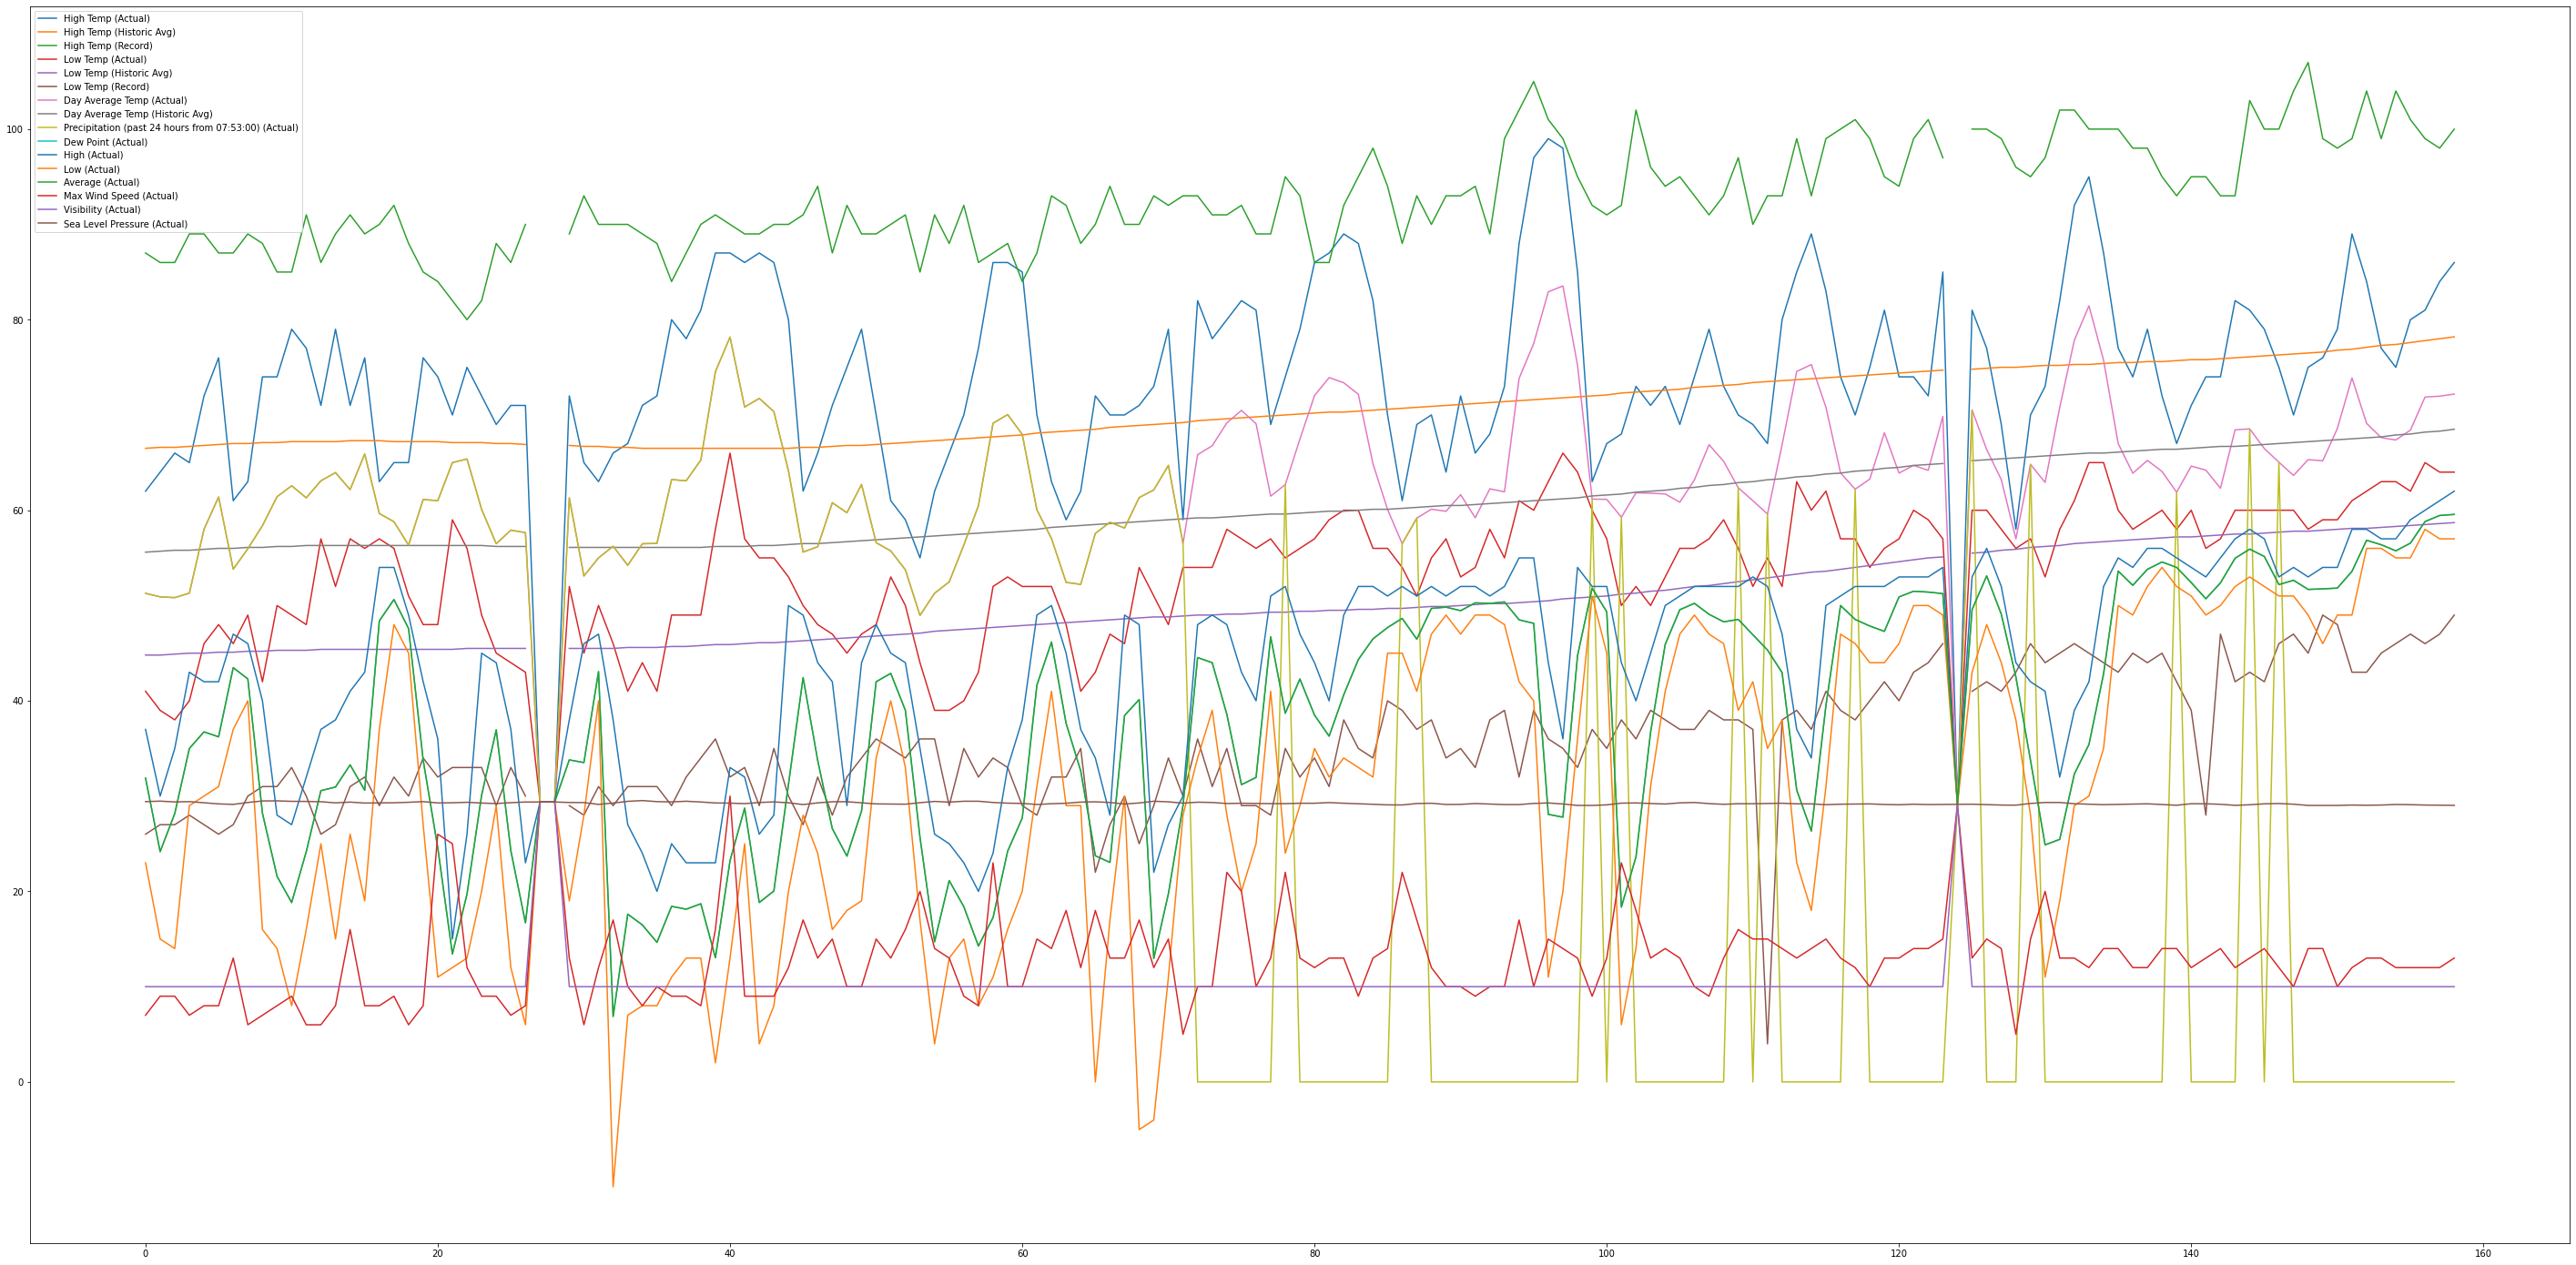

In [12]:
pd.DataFrame(data_frame).plot(figsize=(50,25)).figure.savefig("2022.png")